# Forecast Airline Passenger Traffic

###### Problem Statement: Given airline passenger data (in months), forecast number of passengers that will board per a month in the future.
###### Breakdown: Build a model to forecast the demand (pasenger traffic). The data is classified in data/time and the passengers traveling per month.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('data/AirPassengers.csv')
dataset.head(20)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [3]:
# It can be inferred that we have data per month from year 1949.
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
dataset.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
indexed_data = dataset.set_index(['Month'])
indexed_data.head(12)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [5]:
# lets also look at data in the bottom
indexed_data.tail(12)

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


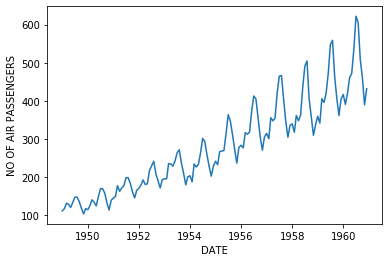

In [6]:
# plot gragh
plt.xlabel('DATE')
plt.ylabel('NO OF AIR PASSENGERS')
plt.plot(indexed_data)

In [7]:
# observations: 
# Trend: There's a clear trend in the data
# Stationarity: Visually variance is increasing over the years (A good candidate to apply tranformation)

# Let us perform our checks for stationarity and not just depend on visual inference

### Stationarity Check
#### 1. Rolling Statistics

In [8]:
# Determine rolling statistics
rolling_mean = indexed_data.rolling(window=12).mean()

rolling_std = indexed_data.rolling(window=12).std()

print(rolling_mean,'\n-----------------------\n', rolling_std)

#Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns] 
-----------------------
             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


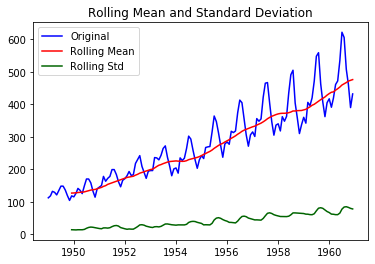

In [9]:
# Plot rolling statistics
orig = plt.plot(indexed_data, label='Original', color='blue')
mean = plt.plot(rolling_mean, label='Rolling Mean', color='red')
std = plt.plot(rolling_std, label='Rolling Std', color='darkgreen')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey Fuller Test
print('Results of Dickey Fuller Test')
dftest = adfuller(indexed_data['#Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test statistic', 'p-value', '# Lags used', 'Number of observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value

print(dfoutput)

Results of Dickey Fuller Test
Test statistic                   0.815369
p-value                          0.991880
# Lags used                     13.000000
Number of observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


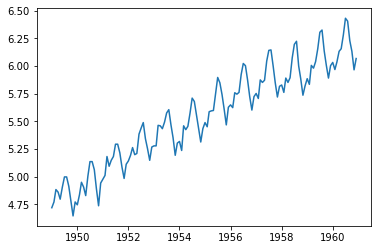

In [11]:
indexed_data_logscale = np.log(indexed_data)
plt.plot(indexed_data_logscale)

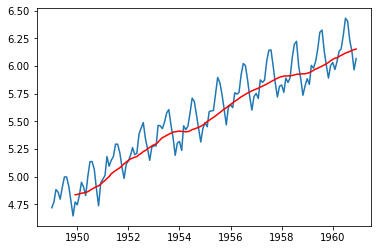

In [12]:
moving_average = indexed_data_logscale.rolling(window=12).mean()
moving_std = indexed_data_logscale.rolling(window=12).std()
plt.plot(indexed_data_logscale)
plt.plot(moving_average, color='red')

In [13]:
indexed_data_logscale_minus_ma = indexed_data_logscale - moving_average
indexed_data_logscale_minus_ma.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [14]:
indexed_data_logscale_minus_ma.dropna(inplace=True)
indexed_data_logscale_minus_ma.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    # Dewtermining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingStd = timeseries.rolling(window=12).std()

    # plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingStd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard deviation')
    plt.show(block=False)

    # Perform ADCF test
    print('Results of Dickey Fuller Test')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '# Lags used'\
    , 'No of observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [16]:
indexed_data_logscale_minus_ma.dropna(inplace=True)

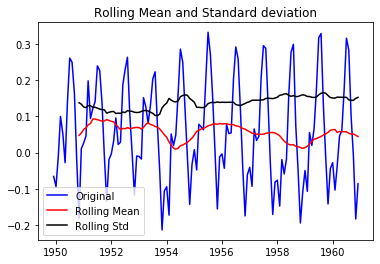

Results of Dickey Fuller Test
Test Statistic              -3.162908
p-value                      0.022235
# Lags used                 13.000000
No of observations used    119.000000
Critical Value (1%)         -3.486535
Critical Value (5%)         -2.886151
Critical Value (10%)        -2.579896
dtype: float64


In [17]:
test_stationarity(indexed_data_logscale_minus_ma)

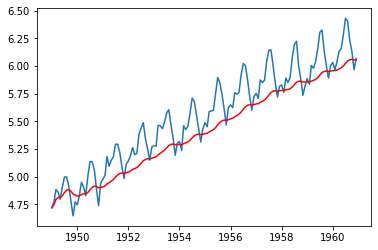

In [18]:
exponentialDecayWeightedAverage = indexed_data_logscale.ewm(halflife=12, min_periods=0,\
adjust=True).mean()
plt.plot(indexed_data_logscale)
plt.plot(exponentialDecayWeightedAverage, color='red')

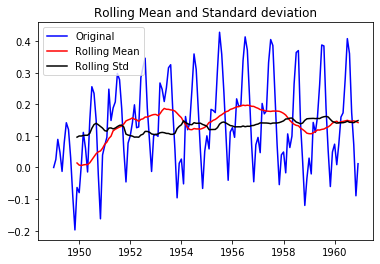

Results of Dickey Fuller Test
Test Statistic              -3.601262
p-value                      0.005737
# Lags used                 13.000000
No of observations used    130.000000
Critical Value (1%)         -3.481682
Critical Value (5%)         -2.884042
Critical Value (10%)        -2.578770
dtype: float64


In [19]:
indexed_data_logscale_minus_ma_exp_decay_avg = indexed_data_logscale - exponentialDecayWeightedAverage
test_stationarity(indexed_data_logscale_minus_ma_exp_decay_avg)

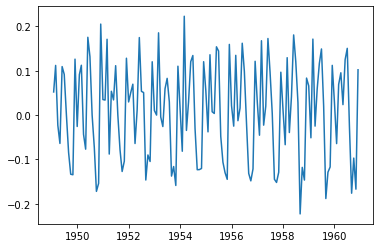

In [20]:
dataset_log_diff_shifting = indexed_data_logscale - indexed_data_logscale.shift()
plt.plot(dataset_log_diff_shifting)

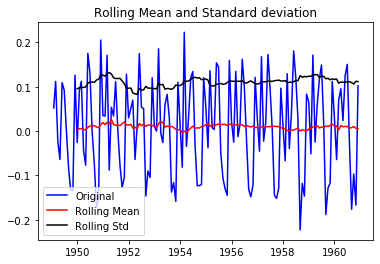

Results of Dickey Fuller Test
Test Statistic              -2.717131
p-value                      0.071121
# Lags used                 14.000000
No of observations used    128.000000
Critical Value (1%)         -3.482501
Critical Value (5%)         -2.884398
Critical Value (10%)        -2.578960
dtype: float64


In [21]:
dataset_log_diff_shifting.dropna(inplace=True)
test_stationarity(dataset_log_diff_shifting)

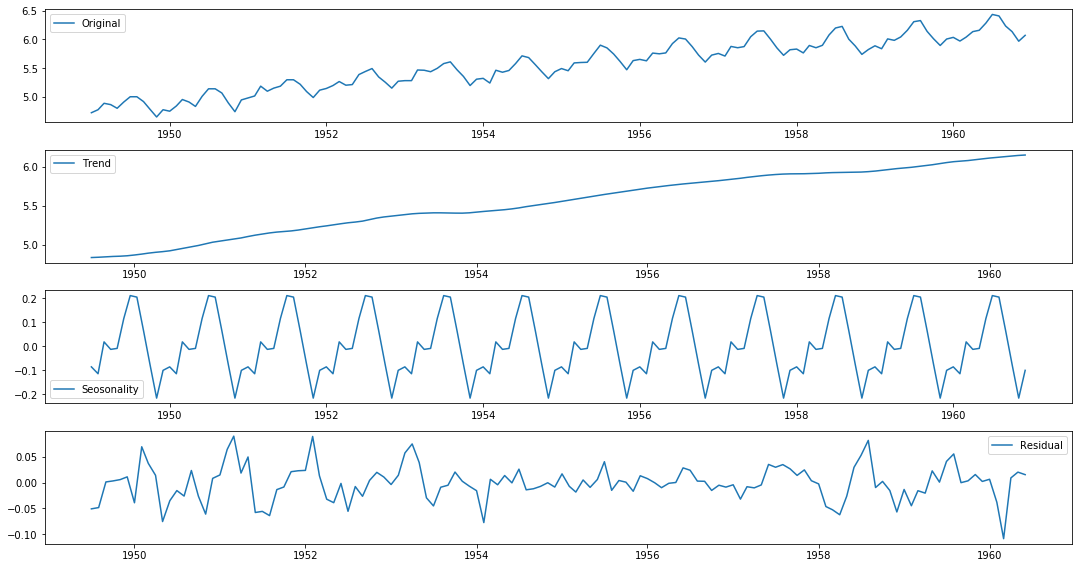

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexed_data_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15, 8))

plt.subplot(411)
plt.plot(indexed_data_logscale, label='Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seosonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.tight_layout()


In [29]:
decomposedLogdata = residual
# test_stationarity(decomposedLogdata)
decomposedLogdata.head()

Month
1949-07-01   -0.050884
1949-08-01   -0.048415
1949-09-01    0.001223
1949-10-01    0.003156
1949-11-01    0.005749
Name: resid, dtype: float64